In [21]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

In [23]:
# Directorio donde vamos a guardar las entradas o imputs 
Data_Dir = "Data"
# Directorio donde vamos a tomar las mediciones\n
Measure_Dir = "mic_behringher_ecm8000"
# Listar los archivos
files = os.listdir(os.path.join(Data_Dir, Measure_Dir))
print(files)

['Behringher-0.txt', 'Behringher-45.txt', 'Behringher-90.txt']


Inicio de Analisis de datos

In [25]:
#Generar la planilla de datos
path_file = os.path.join(Data_Dir,Measure_Dir, files[0])
df = pd.read_csv(path_file, delimiter="\t", header=1)
#seccion para parametrizar el analisis
df

,Frequency (Hz),Magnitude (dB),Phase (degrees),Coherence
0,1.464844,-25.88,-138.65,0.47
1,2.929688,-29.62,-168.00,0.40
2,4.394531,-26.38,163.50,0.75
3,5.859375,-21.45,148.20,0.70
4,7.324219,-15.54,-158.92,0.81
...,...,...,...,...
458,23062.500000,2.36,11.32,0.99
459,23250.000000,2.00,4.56,0.97
460,23437.500000,0.30,17.87,0.67
461,23625.000000,-3.58,-17.26,0.35


Graficos

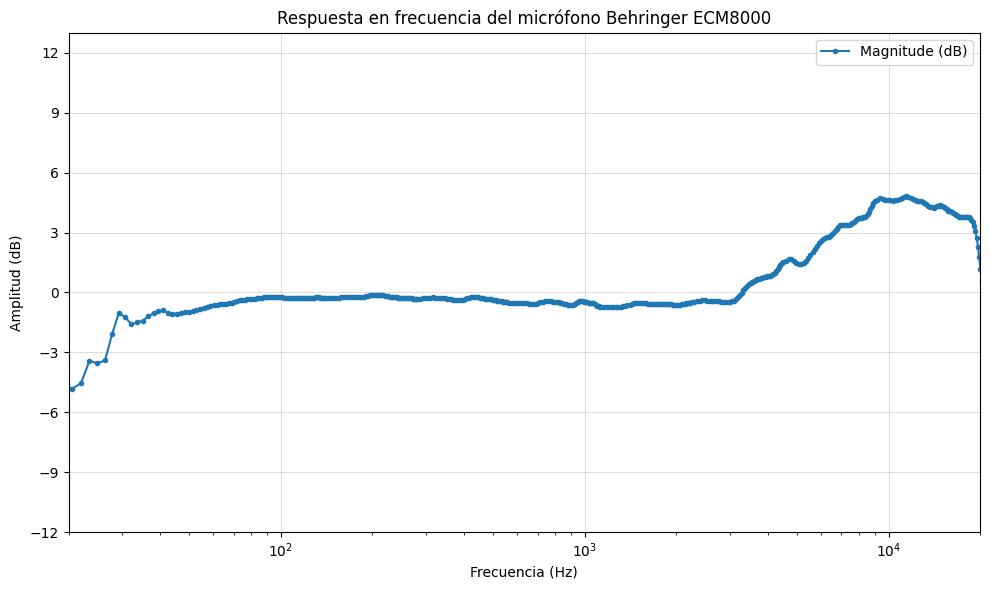

In [ ]:
# Graficación de datos
import matplotlib.pyplot as plt
# Parámetros de graficación (ajusta según necesites)
plot_log_x = True  # True para escala log en X
smooth = False      # True para suavizar la curva con Savitzky-Golay
smooth_window = 11  # debe ser impar y <= len(y)
smooth_poly = 3
save_fig = False    # True para guardar la figura
out_fig = 'grafico.png'

# Comprobar que 'df' esté disponible
if 'df' not in globals() or df is None:
    print("No hay un DataFrame 'df' disponible. Ejecuta la celda de lectura primero.")
else:
    # Selección automática de columnas X e Y
    num_cols = df.select_dtypes(include=[np.number]).columns.tolist()
    if len(num_cols) >= 2:
        xcol, ycol = num_cols[0], num_cols[1]
    else:
        possible_x = ['frequency','freq','f','hz']
        possible_y = ['amplitude','amp','db','level','magnitude']
        xcol = next((c for c in df.columns if any(p in c.lower() for p in possible_x)), None)
        ycol = next((c for c in df.columns if any(p in c.lower() for p in possible_y)), None)
        if xcol is None or ycol is None:
            cols = df.columns.tolist()
            if len(cols) >= 2:
                xcol, ycol = cols[0], cols[1]
            else:
                raise ValueError('No se encontraron columnas adecuadas para graficar')

    # Preparar datos numéricos y limpiar NaNs
    x = pd.to_numeric(df[xcol], errors='coerce')
    y = pd.to_numeric(df[ycol], errors='coerce')
    mask = pd.notna(x) & pd.notna(y)
    x = x[mask]
    y = y[mask]

    # Opcional: suavizado con Savitzky-Golay
    if smooth and len(y) >= smooth_window:
        try:
            from scipy.signal import savgol_filter
            y_plot = savgol_filter(y.values, smooth_window, smooth_poly)
        except Exception as e:
            print('No fue posible aplicar suavizado:', e)
            y_plot = y.values
    else:
        y_plot = y.values

    # Graficar
    plt.figure(figsize=(10,6))
    plt.plot(x, y_plot, marker='.', linestyle='-', color='C0', label=ycol)
    if plot_log_x:
        plt.xscale('log')
        # Límites de 20 Hz a 20 kHz
        plt.xlim(20, 20000)
        # Ticks deseados en frecuencias (mostrar etiquetas legibles)
        ticks = [20,50,100,200,500,1000,2000,5000,10000,20000]
        tick_labels = [str(t) if t < 1000 else f"{int(t/1000)}k" for t in ticks]
        plt.xticks(ticks, tick_labels)
    plt.grid(alpha=0.4, which='both')
    # Saltos por dB
    y_ticks = np.arange(-12, 13, 3)
    plt.ylim(-12,13)
    plt.yticks(y_ticks)
    # Etiquetas solicitadas
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.title('Respuesta en frecuencia del micrófono Behringer ECM8000')
    plt.legend()
    plt.tight_layout()
    if save_fig:
        plt.savefig(out_fig, dpi=300)
        print(f'Figura guardada en: {out_fig}')
    plt.show()